# Comparing cell state abundances among sandwich culture, dome culture, and in vivo reference data - Figure 1D

In [1]:
%matplotlib inline

import os
import helper_functions_GSE164638 as hf

import scanpy as sc
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
# for AnnData objects from Scanpy:
# These AnnData objects contain output from the filtering and QC notebook
# Containing unnormalized counts matrices with low-count barcodes removed
h5ad_dir = '_h5ad_files'
os.makedirs(h5ad_dir, exist_ok=True)

# for plots from matplotlib, seaborn, helper functions plots:
plot_dir = '_plots_abundance_analysis'
os.makedirs(plot_dir, exist_ok=True)

# for SPRING plots:
spring_main='_spring'
os.makedirs(spring_main, exist_ok=True)

In [3]:
# Set up parameter settings for plots

# matplotlib params:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=12)
plt.rcParams['pdf.fonttype'] = 42

# scanpy settings:
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figure

# seaborn
sns.set(context='notebook', style='white', font_scale=1.8)

In [4]:
adata = sc.read(f'{h5ad_dir}/adata_annotated_sand_dome.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 13062 × 30005
    obs: 'condition', 'batch', 'reads', 'aligned reads', 'n_counts', 'included after filter', 'Library Name', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'percent_mito', 'mito_frac', 'percent_ribo', 'ribo_frac', 'n_genes', 'S_score', 'G2M_score', 'phase', 'leiden', 'gene_score_z_state_marker_Enteroendocrine', 'gene_score_state_marker_Enteroendocrine', 'gene_score_z_state_marker_Stem', 'gene_score_state_marker_Stem', 'gene_score_z_state_marker_Tuft', 'gene_score_state_marker_Tuft', 'gene_score_z_state_marker_Enterocyte', 'gene_score_state_marker_Enterocyte', 'gene_score_z_state_marker_Secretory', 'gene_score_state_marker_Secretory', 'classify_gene_score_state_marker_', 'state', 'state_coarse_grain'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropou

In [6]:
adata_dome = adata[adata.obs['condition'].isin(['Dome'])]

In [7]:
adata_sand = adata[adata.obs['condition'].isin(['Sandwich'])]

In [8]:
abund_dome = hf.abundance_df(adata_dome, 'state_coarse_grain')

In [9]:
abund_sand = hf.abundance_df(adata_sand, 'state_coarse_grain')

In [10]:
abund_dome['Dome abundance'] = abund_dome['state_coarse_grain_abundance']
abund_dome['Dome Log2 abundance'] = np.log2(abund_dome['state_coarse_grain_abundance'])
abund_dome['Log10(Dome abundance)'] = np.log10(abund_dome['state_coarse_grain_abundance'])

In [11]:
abund_sand['Sandwich abundance'] = abund_sand['state_coarse_grain_abundance']
abund_sand['Sandwich Log2 abundance'] = np.log2(abund_sand['state_coarse_grain_abundance'])
abund_sand['Log10(Sandwich abundance)'] = np.log10(abund_sand['state_coarse_grain_abundance'])

In [12]:
abund_sand = abund_sand.sort_values('state')
abund_dome = abund_dome.sort_values('state')

In [13]:
adata_sand.obs['state'].cat.categories 

Index(['Enterocyte', 'Enteroendocrine', 'Secretory', 'Stem', 'Tuft'], dtype='object')

In [14]:
abundance_merge_df = abund_dome.merge(abund_sand, on='state')

In [15]:
abundance_merge_df['Sandwich Abundance %'] = abundance_merge_df['Sandwich abundance']*100
abundance_merge_df['Dome Abundance %'] = abundance_merge_df['Dome abundance']*100

In [16]:
adata_ref = sc.read(f'{h5ad_dir}/adata_annotated_reference_subset_GSE92332.h5ad')

In [17]:
del adata_ref.obs['state'] # prep to replace the cell by cell state assignment

In [18]:
adata_ref.obs['state'] = adata_ref.obs['state_coarse_grain'] # replace the cell by cell state assignment

In [19]:
abundance_ref_df = hf.abundance_df(adata_ref, 'state')

In [20]:
abundance_ref_df 

,state,state_abundance,state_log2_abundance
0,Stem,0.150665,-2.730583
1,Enterocyte,0.681680,-0.552832
2,Enteroendocrine,0.035822,-4.802991
3,Secretory,0.111287,-3.167647
4,Tuft,0.020545,-5.605052


In [21]:
abundance_ref_df['Reference abundance'] = abundance_ref_df['state_abundance']
abundance_ref_df['Reference Log2 abundance'] = np.log2(abundance_ref_df['state_abundance'])
abundance_ref_df['Log10(Reference abundance)'] =np.log10(abundance_ref_df['state_abundance'])

In [22]:
abundance_ref_df['Reference Abundance %'] = abundance_ref_df['Reference abundance']*100

In [23]:
abundance_ref_df.sort_values('state')

,state,state_abundance,state_log2_abundance,Reference abundance,Reference Log2 abundance,Log10(Reference abundance),Reference Abundance %
1,Enterocyte,0.681680,-0.552832,0.681680,-0.552832,-0.166419,68.168050
2,Enteroendocrine,0.035822,-4.802991,0.035822,-4.802991,-1.445844,3.582247
3,Secretory,0.111287,-3.167647,0.111287,-3.167647,-0.953557,11.128671
0,Stem,0.150665,-2.730583,0.150665,-2.730583,-0.821987,15.066509
4,Tuft,0.020545,-5.605052,0.020545,-5.605052,-1.687289,2.054524


In [24]:
abundance_merge_df_ = abundance_ref_df.merge(abundance_merge_df, on='state')

In [25]:
abundance_merge_df_

,state,state_abundance,state_log2_abundance,Reference abundance,Reference Log2 abundance,Log10(Reference abundance),Reference Abundance %,state_coarse_grain_abundance_x,state_coarse_grain_log2_abundance_x,Dome abundance,Dome Log2 abundance,Log10(Dome abundance),state_coarse_grain_abundance_y,state_coarse_grain_log2_abundance_y,Sandwich abundance,Sandwich Log2 abundance,Log10(Sandwich abundance),Sandwich Abundance %,Dome Abundance %
0,Stem,0.150665,-2.730583,0.150665,-2.730583,-0.821987,15.066509,0.163485,-2.612773,0.163485,-2.612773,-0.786523,0.109849,-3.186402,0.109849,-3.186402,-0.959202,10.984936,16.348462
1,Enterocyte,0.681680,-0.552832,0.681680,-0.552832,-0.166419,68.168050,0.673374,-0.570521,0.673374,-0.570521,-0.171744,0.801622,-0.319006,0.801622,-0.319006,-0.096030,80.162225,67.337373
2,Enteroendocrine,0.035822,-4.802991,0.035822,-4.802991,-1.445844,3.582247,0.029039,-5.105888,0.029039,-5.105888,-1.537025,0.017381,-5.846326,0.017381,-5.846326,-1.759920,1.738123,2.903853
3,Secretory,0.111287,-3.167647,0.111287,-3.167647,-0.953557,11.128671,0.122328,-3.031177,0.122328,-3.031177,-0.912475,0.064426,-3.956204,0.064426,-3.956204,-1.190936,6.442642,12.232766
4,Tuft,0.020545,-5.605052,0.020545,-5.605052,-1.687289,2.054524,0.011775,-6.408072,0.011775,-6.408072,-1.929022,0.006721,-7.217164,0.006721,-7.217164,-2.172583,0.672074,1.177547


In [26]:
abundance_merge_df_ = abundance_merge_df_[['state', 'Reference Abundance %', 'Sandwich Abundance %', 'Dome Abundance %']]

In [27]:
abundance_merge_df_

,state,Reference Abundance %,Sandwich Abundance %,Dome Abundance %
0,Stem,15.066509,10.984936,16.348462
1,Enterocyte,68.168050,80.162225,67.337373
2,Enteroendocrine,3.582247,1.738123,2.903853
3,Secretory,11.128671,6.442642,12.232766
4,Tuft,2.054524,0.672074,1.177547


In [28]:
def plot_abundance(g1, g2, g3, abundance_df, group, corr_method='Pearson', show_corr=True):
    '''
    Plot the abundance values for each state in a merged dataframe of abundance levels for different sets of data. 
    
    Arguments:
    ----------
    x: col of dataframe
        set of abundance levels for x-axis of plot; represents one set of abundance levels
    y: col of dataframe
        set of abundance levels for y-axis of plot; represents another set of abundance levels
    group: col of dataframe
        abundance level group - usually the state variable.
    corr_method: string
        scipy.stats method to calculate the correlation of abundance between x levels and y levels
        Options: Pearson or Spearman
    show_corr: bool
    	if True, shows the correlation method on the plot
        
    Returns:
    --------
    plot: seaborn scatterplot object
        scatterplot of abundance levels for each group with best fit line and Pearson or Spearman correlation.
        
    '''
    
    x=abundance_df[g1]
    y=abundance_df[g2]
    z=abundance_df[g3]
    
    fig = plt.figure(figsize=(15, 15))
    sns.set(style='white', font_scale=2.0, font='Arial')
    
    ax = sns.scatterplot(x=x, y=y, data=abundance_merge_df, hue=group, s=700, linewidth=3, edgecolor='k')

    plot = sns.scatterplot(x=x, y=z,data=abundance_df, ax=ax, hue=group, marker='^', s=700, linewidth=3, edgecolor='k')
    
    #plt.plot(np.unique(x.values), np.poly1d(np.polyfit(x.values, y.values, 1))(np.unique(x.values)), 'b-')
    #plt.plot(np.unique(x.values), np.poly1d(np.polyfit(x.values, z.values, 1))(np.unique(x.values)), 'k-')
    


    # now plot both limits against eachother
    #ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    #ax.set_xlim(lims)
    #ax.set_ylim(lims)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)

    
    if corr_method == 'Pearson':
        corr1 = scipy.stats.pearsonr(x, y)[0]
        corr2 = scipy.stats.pearsonr(x, z)[0]  
    elif corr_method == 'Spearman':
        corr1 = scipy.stats.spearmanr(x, y)[0]
        corr2 = scipy.stats.spearmanr(x, z)[0] 
    
    corr1 = np.around(corr1, decimals=4)
    corr2 = np.around(corr2, decimals=4)
    
    g1_label = g1
    g2_label = g2
    g3_label = g3

    
    if show_corr:
        plt.text(x.max()/2, y.min()/2, f'{g1_label} v. {g2_label}\n{corr_method} R = {corr1}', c='k')
        plt.text(x.max()/2, z.min()/2, f'{g1_label} v. {g3_label}\n{corr_method} R = {corr2}', c='k')

    plt.tight_layout()
    
    return plot, corr1, corr2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


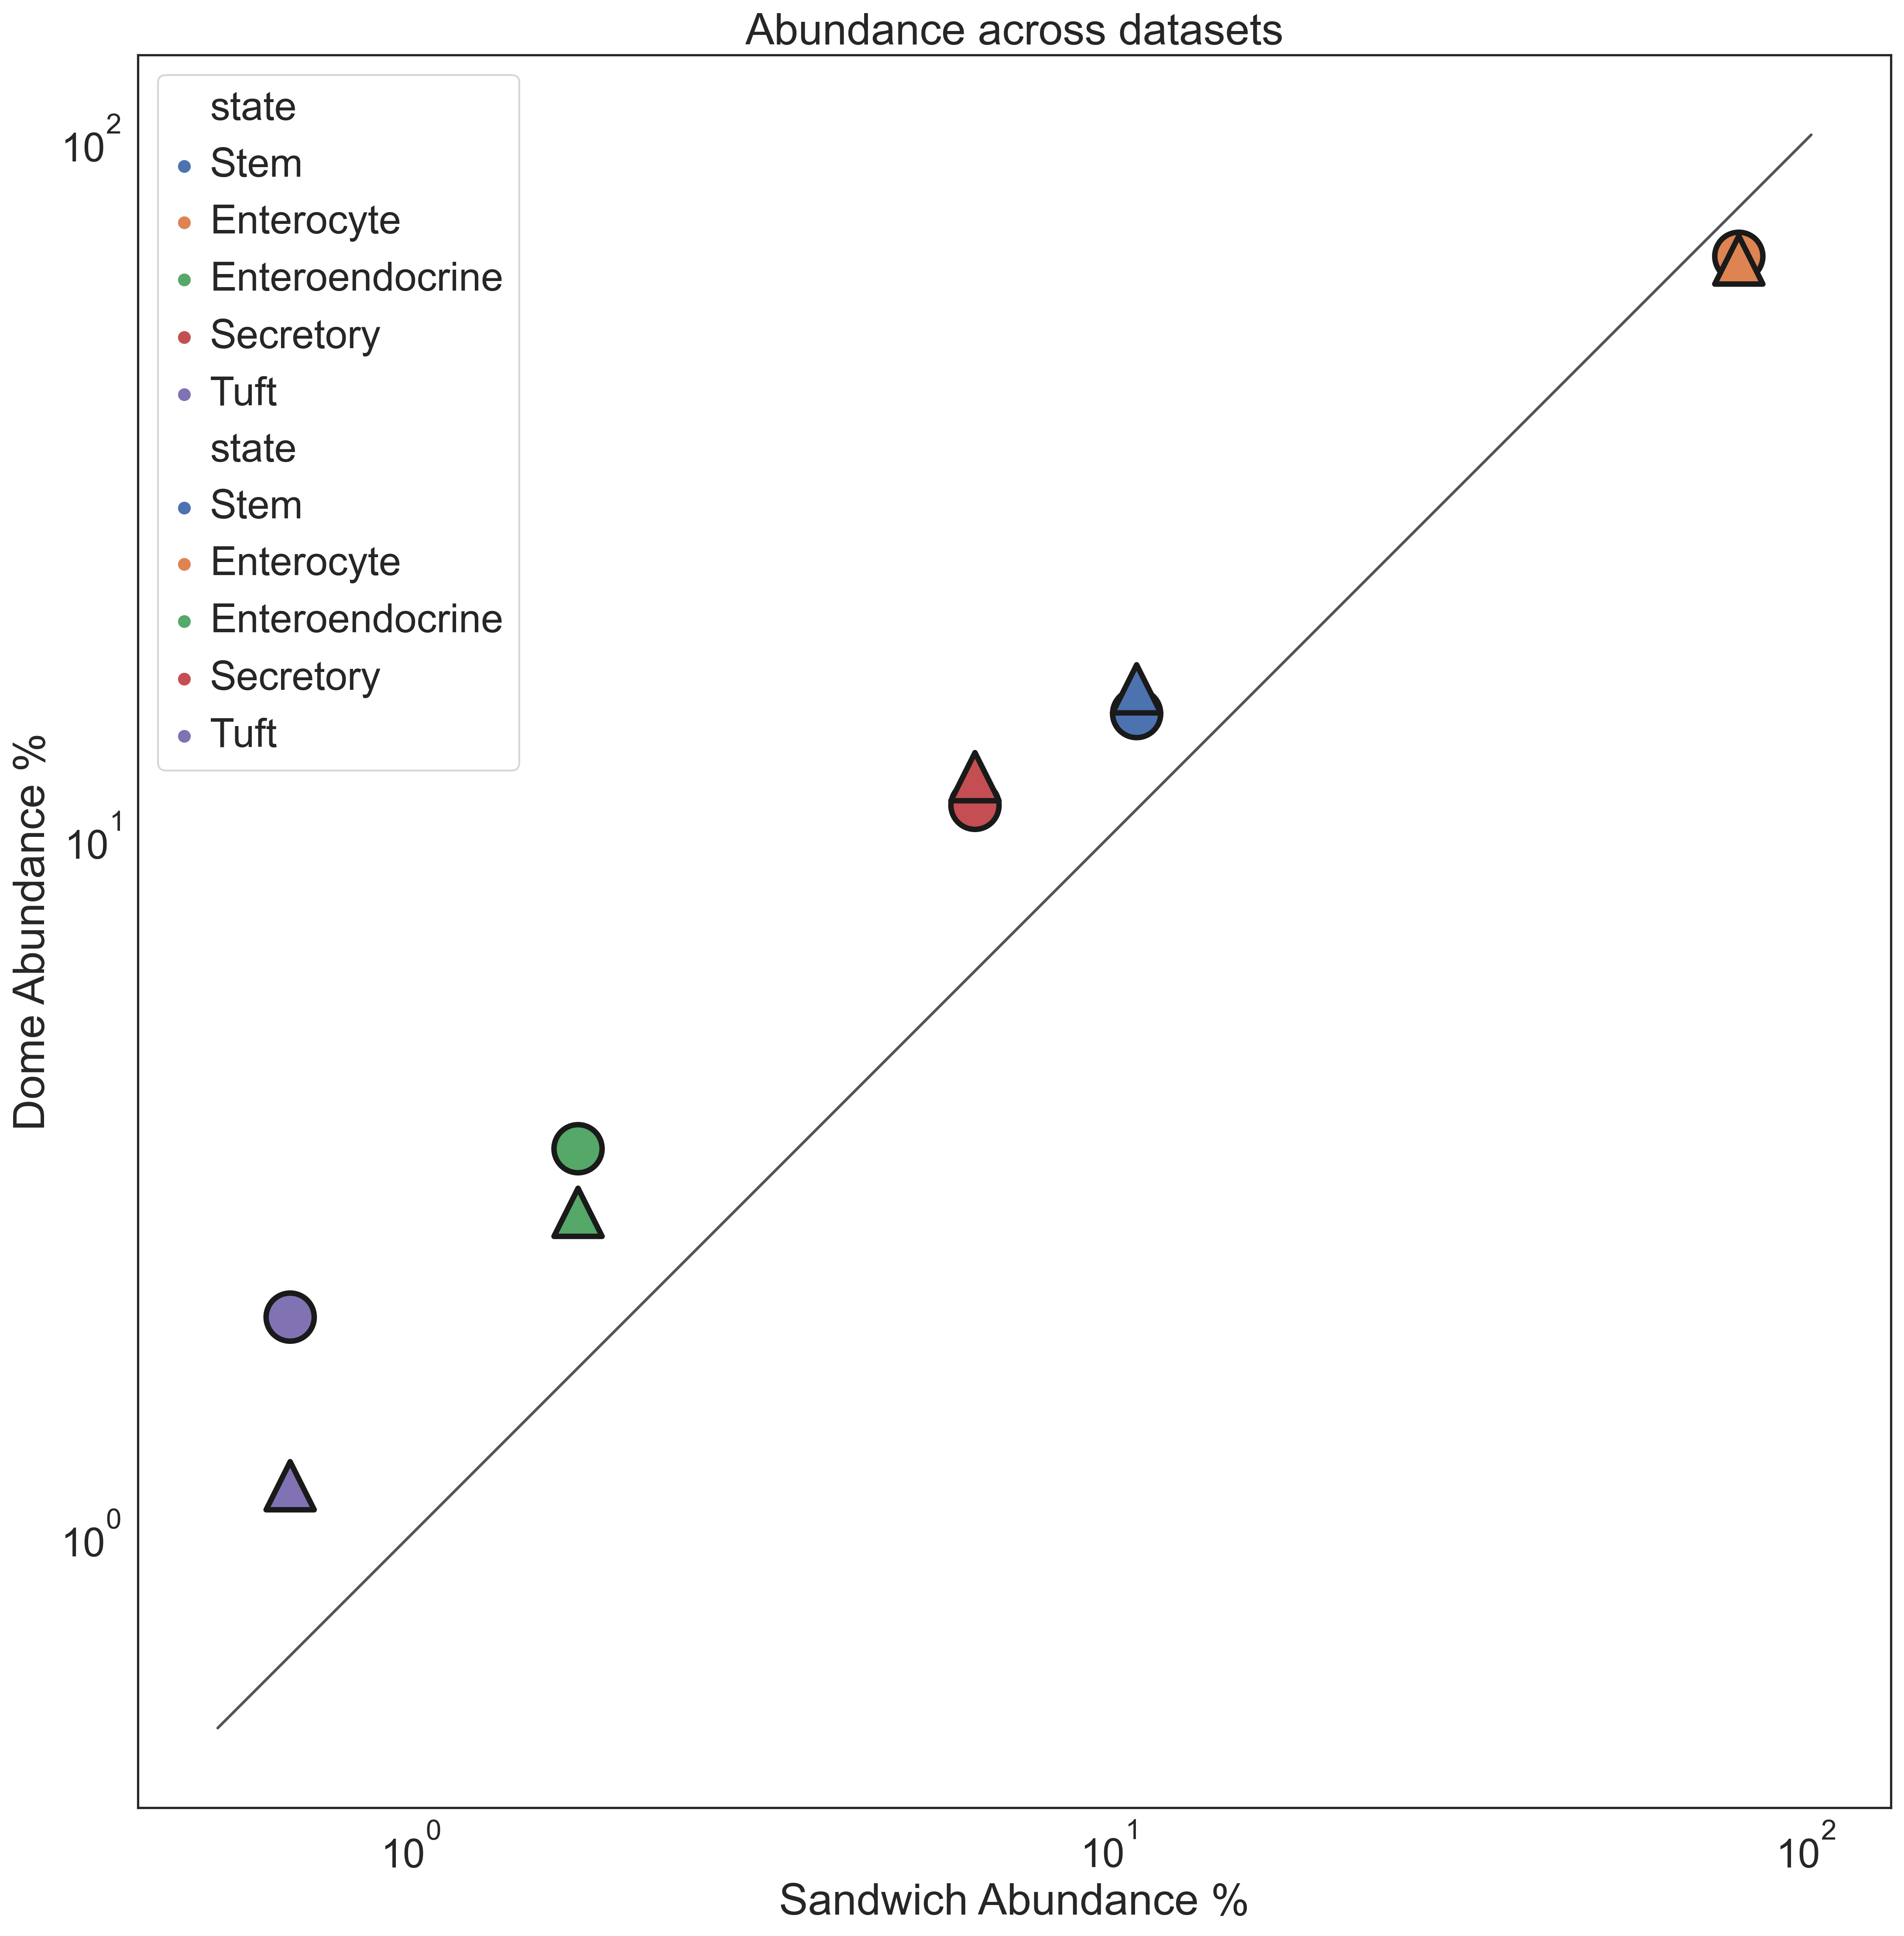

In [29]:
ax1, corr_knn_sr, corr_knn_sd = plot_abundance('Sandwich Abundance %', 'Reference Abundance %', 'Dome Abundance %', abundance_merge_df_, abundance_merge_df_['state'], corr_method='Pearson', show_corr=False)

#plt.setp(ax1.get_legend().get_texts(), fontsize='22') # for legend text
#plt.setp(ax1.get_legend().get_title(), fontsize='32')
plt.title('Abundance across datasets')
#ax1.set_xscale('log')
#ax1.set_yscale('log')
plt.savefig(f'{plot_dir}/log_scale_abundance_plot_ref_sand_dome.eps')
plt.show()

In [30]:
print('correlation sandwich reference:', corr_knn_sr)
print('correlation sandwich dome:', corr_knn_sd)

correlation sandwich reference: 0.997
correlation sandwich dome: 0.9932
